In [1]:

# open .pt file containing an array
import torch
import numpy as np

# load the model
#real_images = torch.load('/mnt/d/projects/cardiac_gan/results/2024-03-10_01-24-33/2024-03-10_01-24-33_real.pt')
#syn_images = torch.load('/mnt/d/projects/cardiac_gan/results/2024-03-10_01-24-33/2024-03-10_01-24-33_syn.pt')

#real_images = torch.load('/mnt/d/projects/cardiac_gan/results/2024-03-19_16-57-06/2024-03-19_16-57-06_real.pt')
#syn_images = torch.load('/mnt/d/projects/cardiac_gan/results/2024-03-19_16-57-06/2024-03-19_16-57-06_syn.pt')

real_images = torch.load('/mnt/d/projects/cardiac_gan/results/2024-06-08_21-15-55/testold/2024-06-08_21-15-55_real.pt')
syn_images = torch.load('/mnt/d/projects/cardiac_gan/results/2024-06-08_21-15-55/testold/2024-06-08_21-15-55_syn.pt')

not_care_class = True

print(real_images.shape)
print(syn_images.shape)

# convert images to single channel
real_images = real_images[:940, 0, :, :]
syn_images = syn_images[:940, 0, :, :]

#real_images = (real_images + 1) / 2 
syn_images = syn_images * 2 - 1 

# load the png images from the same folder in order
import os
import cv2

#masks_path = '/mnt/d/projects/cardiac_gan/results/2024-03-10_01-24-33/labels_visible'
#masks_path = '/mnt/d/projects/cardiac_gan/results/2024-03-19_16-57-06/labels_visible'
masks_path = '/mnt/d/projects/cardiac_gan/results/2024-06-08_21-15-55/testold/2024-06-08_21-15-55/labels_visible'

masks = []
for i in range(len(real_images)):
    file_name = f'{i:02d}.png'
    print(file_name)
    mask = cv2.imread(os.path.join(masks_path, file_name), cv2.IMREAD_GRAYSCALE)
    masks.append(mask)

# print shapes
print(real_images.shape)
print(np.array(syn_images).shape)
print(np.array(masks).shape)

torch.Size([950, 3, 256, 256])
torch.Size([950, 3, 256, 256])
00.png
01.png
02.png
03.png
04.png
05.png
06.png
07.png
08.png
09.png
10.png
11.png
12.png
13.png
14.png
15.png
16.png
17.png
18.png
19.png
20.png
21.png
22.png
23.png
24.png
25.png
26.png
27.png
28.png
29.png
30.png
31.png
32.png
33.png
34.png
35.png
36.png
37.png
38.png
39.png
40.png
41.png
42.png
43.png
44.png
45.png
46.png
47.png
48.png
49.png
50.png
51.png
52.png
53.png
54.png
55.png
56.png
57.png
58.png
59.png
60.png
61.png
62.png
63.png
64.png
65.png
66.png
67.png
68.png
69.png
70.png
71.png
72.png
73.png
74.png
75.png
76.png
77.png
78.png
79.png
80.png
81.png
82.png
83.png
84.png
85.png
86.png
87.png
88.png
89.png
90.png
91.png
92.png
93.png
94.png
95.png
96.png
97.png
98.png
99.png
100.png
101.png
102.png
103.png
104.png
105.png
106.png
107.png
108.png
109.png
110.png
111.png
112.png
113.png
114.png
115.png
116.png
117.png
118.png
119.png
120.png
121.png
122.png
123.png
124.png
125.png
126.png
127.png
128.png
129.pn

In [2]:
print(real_images[0].shape)
print(masks[0].shape)

torch.Size([256, 256])
(256, 256)


In [3]:
average_wall_real_T1 = []
average_venticle_real_T1 = []
average_wall_syn_T1 = []
average_venticle_syn_T1 = []

average_wall_real_T2 = []
average_venticle_real_T2 = []
average_wall_syn_T2 = []
average_venticle_syn_T2 = []


for i, mask in enumerate(masks):
    print(i)
    venticle_val = np.max(mask)

    unique = np.unique(mask)
    print(unique)
    # remove 0 from the unique values
    if not_care_class:
        unique = unique[unique != 0]

    wall_val = unique[1] if len(unique) > 2 else -1
    venticle_mask = mask == venticle_val
    wall_mask = mask == wall_val
    
    # calculate the average intensity of the venticle and wall on real and synthetic images
    venticle_intensity_real = torch.mean(real_images[i][venticle_mask])
    wall_intensity_real = torch.mean(real_images[i][wall_mask])

    venticle_intensity_syn = torch.mean(syn_images[i][venticle_mask])
    wall_intensity_syn = torch.mean(syn_images[i][wall_mask])

    print(f'Venticle val: {venticle_val}, wall val: {wall_val}')

    print(f'Venticle real: {venticle_intensity_real}, wall real: {wall_intensity_real}')
    print(f'Venticle syn: {venticle_intensity_syn}, wall syn: {wall_intensity_syn}')
    if not_care_class:
        T1_venticle_val = 109
        T2_venticle_val = 219
    else:
        T1_venticle_val = 85
        T2_venticle_val = 213


    if T1_venticle_val == venticle_val:
        average_venticle_real_T1.append(venticle_intensity_real)
        average_venticle_syn_T1.append(venticle_intensity_syn)
        average_wall_real_T1.append(wall_intensity_real)
        average_wall_syn_T1.append(wall_intensity_syn)
    elif T2_venticle_val == venticle_val:
        average_venticle_real_T2.append(venticle_intensity_real)
        average_venticle_syn_T2.append(venticle_intensity_syn)
        average_wall_real_T2.append(wall_intensity_real)
        average_wall_syn_T2.append(wall_intensity_syn)
    
    



0
[  0 146 182 219]
Venticle val: 219, wall val: 182
Venticle real: 0.36635714769363403, wall real: 0.12465275079011917
Venticle syn: 0.30732911825180054, wall syn: 0.14475664496421814
1
[  0 146 182 219]
Venticle val: 219, wall val: 182
Venticle real: 0.36362916231155396, wall real: 0.13061322271823883
Venticle syn: 0.27312391996383667, wall syn: 0.11760679632425308
2
[  0 146 182 219]
Venticle val: 219, wall val: 182
Venticle real: 0.35894760489463806, wall real: 0.12691225111484528
Venticle syn: 0.29270556569099426, wall syn: 0.12328590452671051
3
[  0 146 182 219]
Venticle val: 219, wall val: 182
Venticle real: 0.15212121605873108, wall real: 0.11670977622270584
Venticle syn: 0.19533942639827728, wall syn: 0.12314891070127487
4
[  0 146 182 219]
Venticle val: 219, wall val: 182
Venticle real: 0.16405455768108368, wall real: 0.11805136501789093
Venticle syn: 0.24704912304878235, wall syn: 0.1218181923031807
5
[  0 146 182 219]
Venticle val: 219, wall val: 182
Venticle real: 0.285005

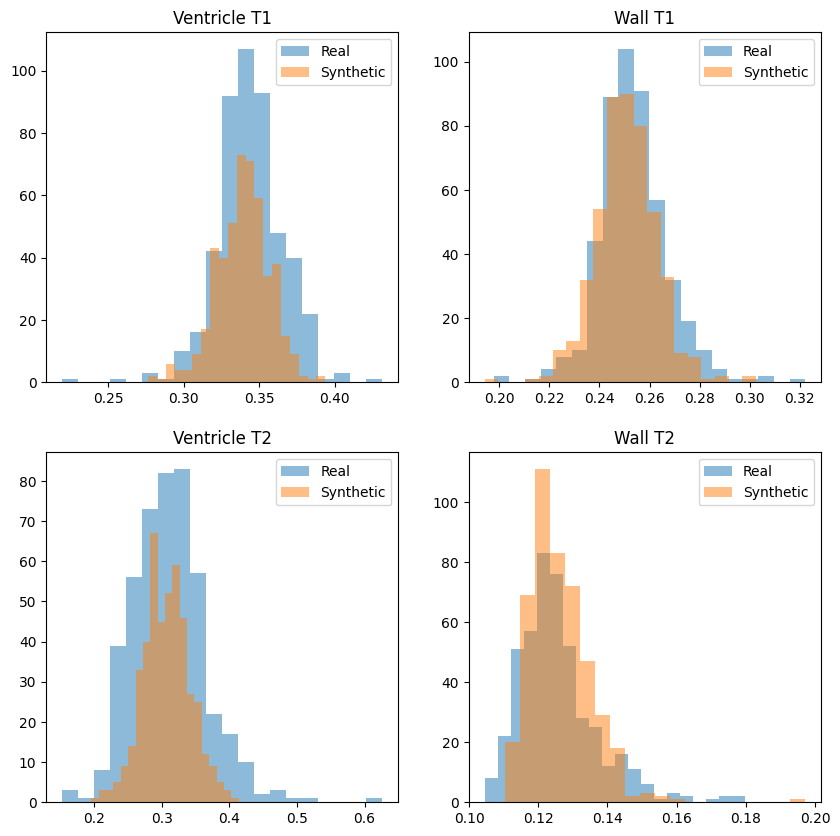

In [4]:
# viusalize the results
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].hist(average_venticle_real_T1, bins=20, alpha=0.5, label='Real')
ax[0, 0].hist(average_venticle_syn_T1, bins=20, alpha=0.5, label='Synthetic')
ax[0, 0].set_title('Ventricle T1')
ax[0, 0].legend()

ax[0, 1].hist(average_wall_real_T1, bins=20, alpha=0.5, label='Real')
ax[0, 1].hist(average_wall_syn_T1, bins=20, alpha=0.5, label='Synthetic')
ax[0, 1].set_title('Wall T1')
ax[0, 1].legend()

ax[1, 0].hist(average_venticle_real_T2, bins=20, alpha=0.5, label='Real')
ax[1, 0].hist(average_venticle_syn_T2, bins=20, alpha=0.5, label='Synthetic')
ax[1, 0].set_title('Ventricle T2')
ax[1, 0].legend()

ax[1, 1].hist(average_wall_real_T2, bins=20, alpha=0.5, label='Real')
ax[1, 1].hist(average_wall_syn_T2, bins=20, alpha=0.5, label='Synthetic')
ax[1, 1].set_title('Wall T2')
ax[1, 1].legend()

plt.show()







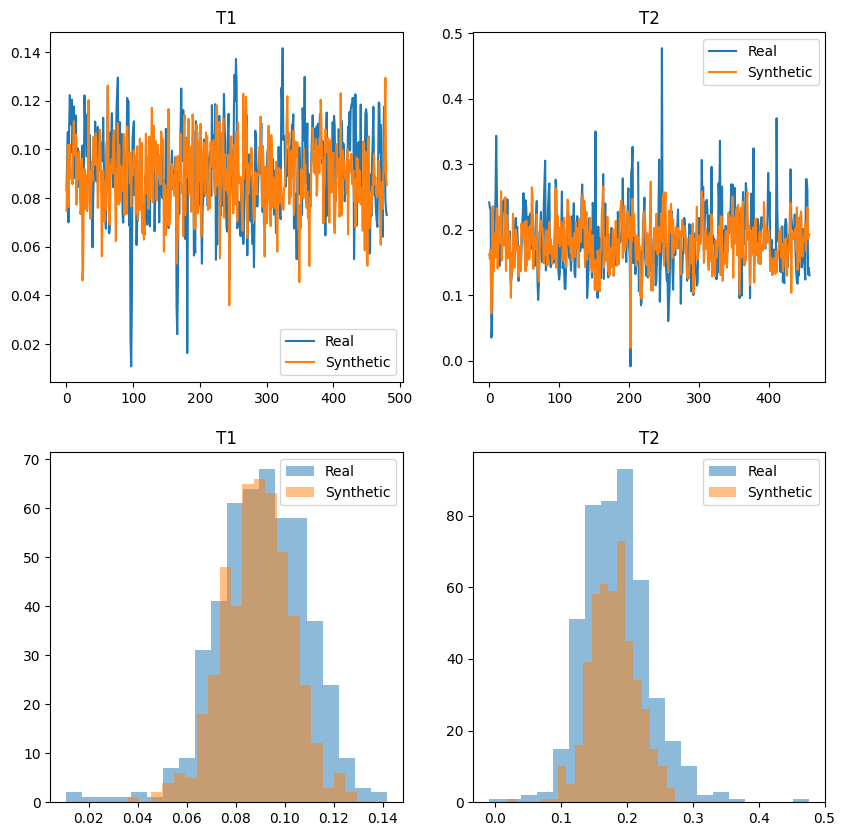

T1 Real: 0.09070944041013718, 0.01829127036035061
T1 Synthetic: 0.08868574351072311, 0.014022944495081902
T2 Real: 0.18519192934036255, 0.05175887420773506
T2 Synthetic: 0.18022023141384125, 0.03509462997317314


In [5]:
# plot wall and venticle intensity difference per image
diff_T1_real = [a - b for a, b in zip(average_venticle_real_T1, average_wall_real_T1)]
diff_T1_syn = [a - b for a, b in zip(average_venticle_syn_T1, average_wall_syn_T1)]
diff_T2_real = [a - b for a, b in zip(average_venticle_real_T2, average_wall_real_T2)]
diff_T2_syn = [a - b for a, b in zip(average_venticle_syn_T2, average_wall_syn_T2)]

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].plot(diff_T1_real, label='Real')
ax[0, 0].plot(diff_T1_syn, label='Synthetic')
ax[0, 0].set_title('T1')
ax[0, 0].legend()

ax[0, 1].plot(diff_T2_real, label='Real')
ax[0, 1].plot(diff_T2_syn, label='Synthetic')
ax[0, 1].set_title('T2')
ax[0, 1].legend()

ax[1, 0].hist(diff_T1_real, bins=20, alpha=0.5, label='Real')
ax[1, 0].hist(diff_T1_syn, bins=20, alpha=0.5, label='Synthetic')
ax[1, 0].set_title('T1')
ax[1, 0].legend()

ax[1, 1].hist(diff_T2_real, bins=20, alpha=0.5, label='Real')
ax[1, 1].hist(diff_T2_syn, bins=20, alpha=0.5, label='Synthetic')
ax[1, 1].set_title('T2')
ax[1, 1].legend()

plt.show()

# convert the lists to numpy arrays
diff_T1_real = np.array(diff_T1_real)
diff_T1_syn = np.array(diff_T1_syn)
diff_T2_real = np.array(diff_T2_real)
diff_T2_syn = np.array(diff_T2_syn)

# print the average difference and std
print(f'T1 Real: {np.nanmean(diff_T1_real)}, {np.nanstd(diff_T1_real)}')
print(f'T1 Synthetic: {np.nanmean(diff_T1_syn)}, {np.nanstd(diff_T1_syn)}')
print(f'T2 Real: {np.nanmean(diff_T2_real)}, {np.nanstd(diff_T2_real)}')
print(f'T2 Synthetic: {np.nanmean(diff_T2_syn)}, {np.nanstd(diff_T2_syn)}')





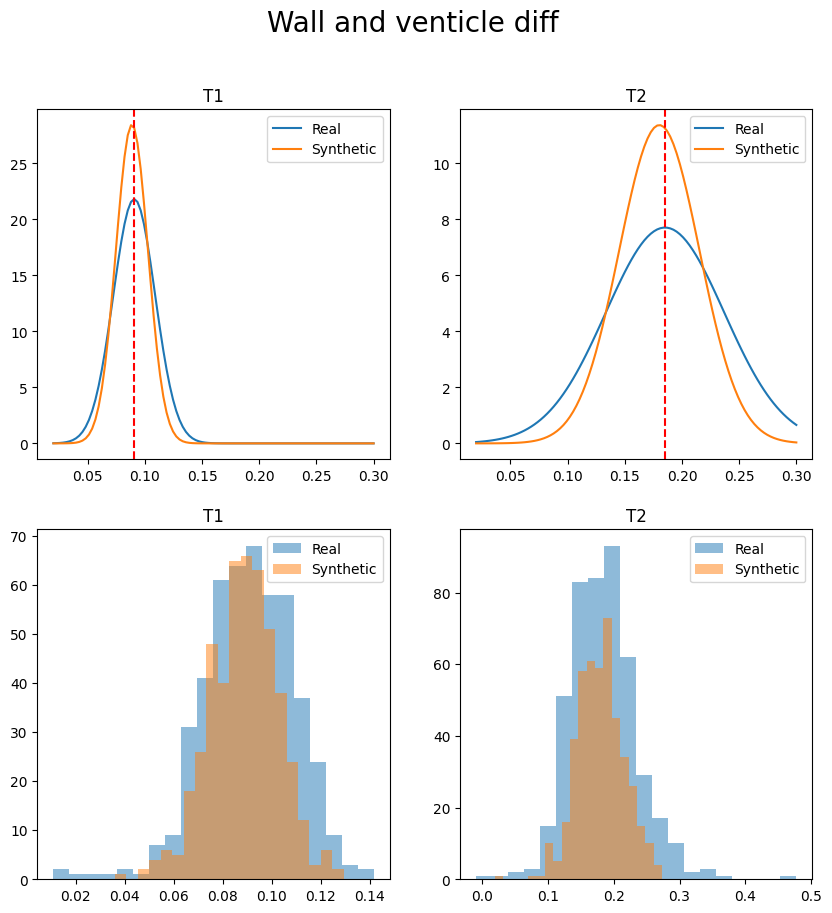

In [6]:
# visualize the distribution of the difference from mean and std as gaussian
import scipy.stats as stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Wall and venticle diff', fontsize=20)
x = np.linspace(0.02, 0.3, 100)
ax[0, 0].plot(x, stats.norm.pdf(x, np.nanmean(diff_T1_real), np.nanstd(diff_T1_real)), label='Real')
ax[0, 0].plot(x, stats.norm.pdf(x, np.nanmean(diff_T1_syn), np.nanstd(diff_T1_syn)), label='Synthetic')
# draw the mean with a vertical line
ax[0, 0].axvline(np.nanmean(diff_T1_real), color='r', linestyle='--')
ax[0, 0].set_title('T1')
ax[0, 0].legend()

ax[0, 1].plot(x, stats.norm.pdf(x, np.nanmean(diff_T2_real), np.nanstd(diff_T2_real)), label='Real')
ax[0, 1].plot(x, stats.norm.pdf(x, np.nanmean(diff_T2_syn), np.nanstd(diff_T2_syn)), label='Synthetic')
# draw the mean with a vertical line
ax[0, 1].axvline(np.nanmean(diff_T2_real), color='r', linestyle='--')
ax[0, 1].set_title('T2')
ax[0, 1].legend()

ax[1, 0].hist(diff_T1_real, bins=20, alpha=0.5, label='Real')
ax[1, 0].hist(diff_T1_syn, bins=20, alpha=0.5, label='Synthetic')
ax[1, 0].set_title('T1')
ax[1, 0].legend()

ax[1, 1].hist(diff_T2_real, bins=20, alpha=0.5, label='Real')
ax[1, 1].hist(diff_T2_syn, bins=20, alpha=0.5, label='Synthetic')
ax[1, 1].set_title('T2')
ax[1, 1].legend()

plt.show()



(0.0, 80.0)

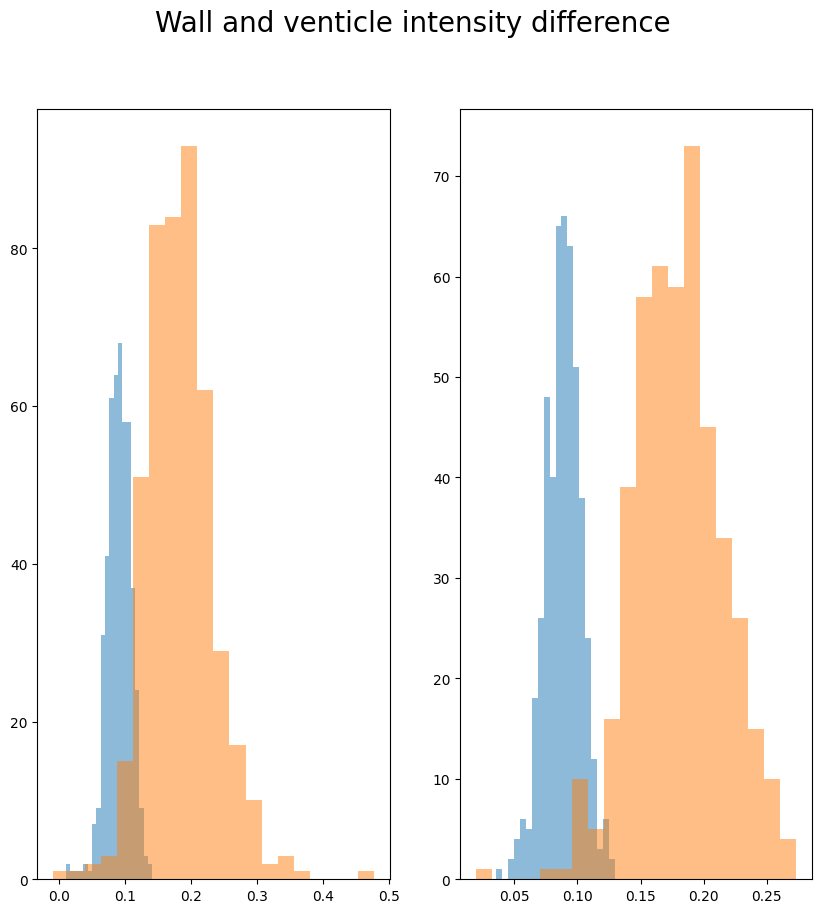

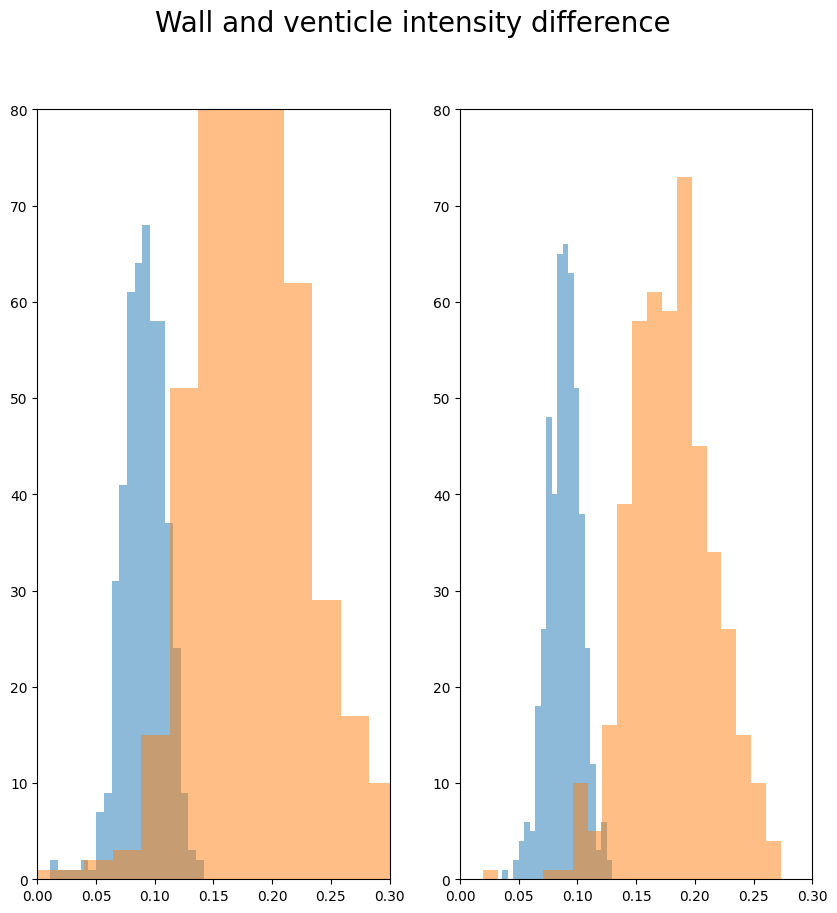

In [7]:
# visualize the difference histograms of the wall and venticle intensities, put the real ones in the same plot and the synthetic ones in the same plot
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
fig.suptitle('Wall and venticle intensity difference', fontsize=20)
ax[0].hist(diff_T1_real, bins=20, alpha=0.5, label='T1')
ax[0].hist(diff_T2_real, bins=20, alpha=0.5, label='T2')

ax[1].hist(diff_T1_syn, bins=20, alpha=0.5, label='T1')
ax[1].hist(diff_T2_syn, bins=20, alpha=0.5, label='T2')

# do the same but with the same axis lenghts
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
fig.suptitle('Wall and venticle intensity difference', fontsize=20)
ax[0].hist(diff_T1_real, bins=20, alpha=0.5, label='T1')
ax[0].hist(diff_T2_real, bins=20, alpha=0.5, label='T2')
ax[0].set_xlim([0, 0.3])
ax[0].set_ylim([0, 80])

ax[1].hist(diff_T1_syn, bins=20, alpha=0.5, label='T1')
ax[1].hist(diff_T2_syn, bins=20, alpha=0.5, label='T2')
ax[1].set_xlim([0, 0.3])
ax[1].set_ylim([0, 80])






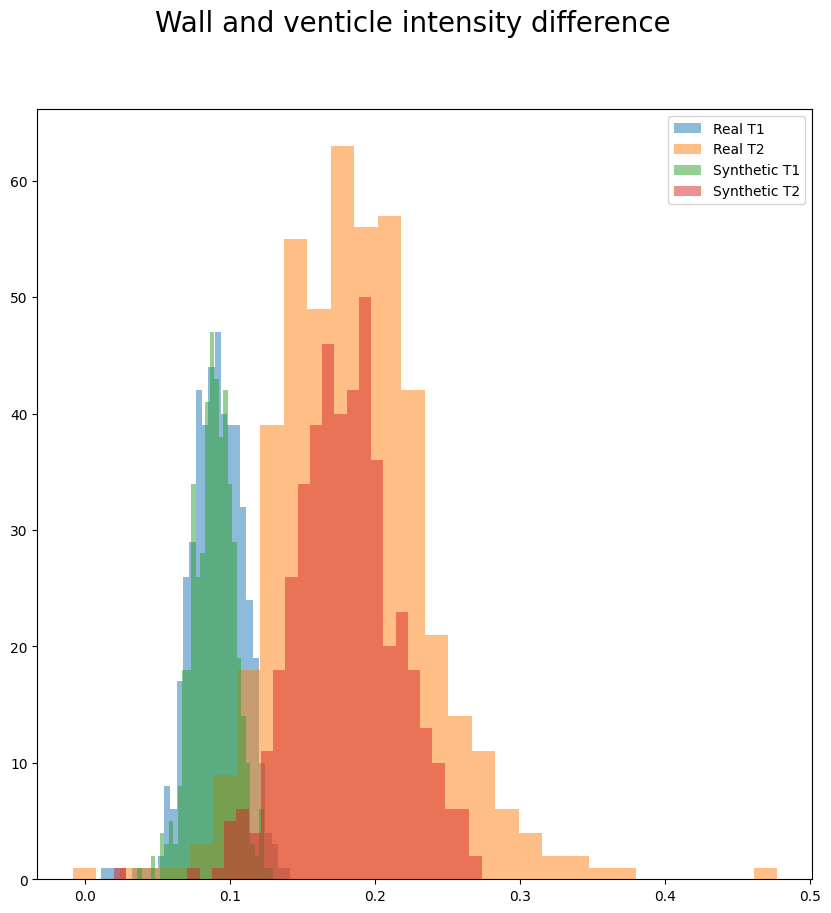

In [8]:
# put all the histograms in the same plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle('Wall and venticle intensity difference', fontsize=20)
ax.hist(diff_T1_real, bins=30, alpha=0.5, label='Real T1')
ax.hist(diff_T2_real, bins=30, alpha=0.5, label='Real T2')
ax.hist(diff_T1_syn, bins=30, alpha=0.5, label='Synthetic T1')
ax.hist(diff_T2_syn, bins=30, alpha=0.5, label='Synthetic T2')
ax.legend()
plt.show()

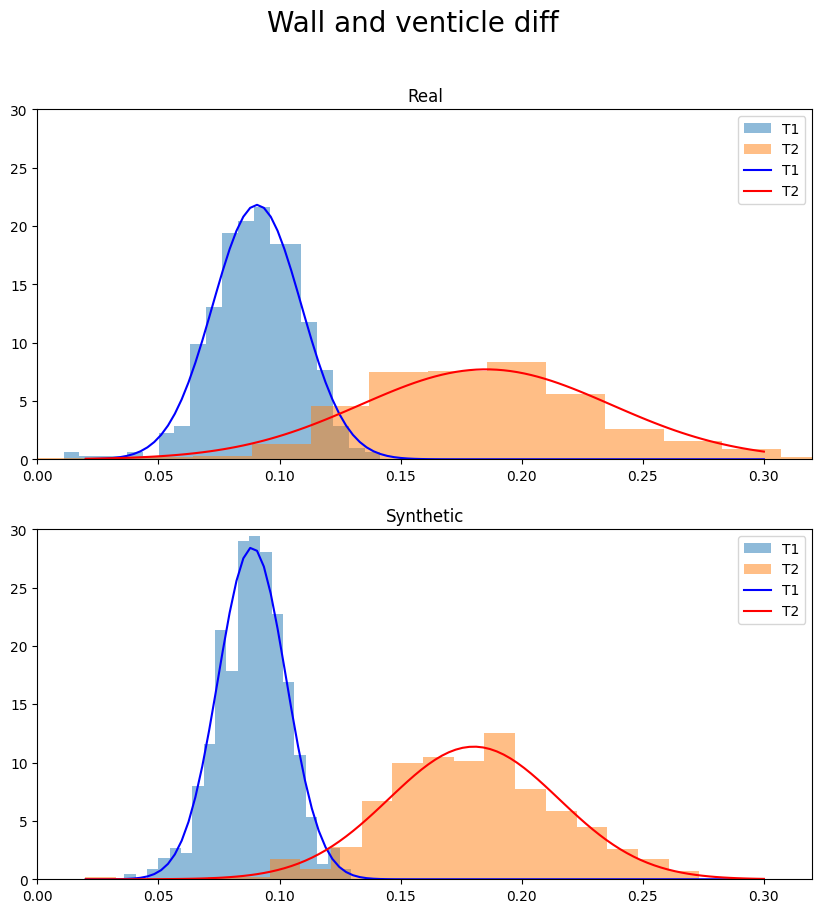

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Wall and venticle diff', fontsize=20)

ax[0].hist(diff_T1_real, bins=20, alpha=0.5, label='T1', density=True)
ax[0].hist(diff_T2_real, bins=20, alpha=0.5, label='T2', density=True)
ax[0].plot(x, stats.norm.pdf(x, np.nanmean(diff_T1_real), np.nanstd(diff_T1_real)), label='T1', color='b')
ax[0].plot(x, stats.norm.pdf(x, np.nanmean(diff_T2_real), np.nanstd(diff_T2_real)), label='T2', color='red')
ax[0].legend()
ax[0].set_title('Real')
ax[0].set_xlim([0, 0.32])
ax[0].set_ylim([0, 30])

ax[1].hist(diff_T1_syn, bins=20, alpha=0.5, label='T1', density=True)
ax[1].hist(diff_T2_syn, bins=20, alpha=0.5, label='T2', density=True)
ax[1].plot(x, stats.norm.pdf(x, np.nanmean(diff_T1_syn), np.nanstd(diff_T1_syn)), label='T1', color='b')
ax[1].plot(x, stats.norm.pdf(x, np.nanmean(diff_T2_syn), np.nanstd(diff_T2_syn)), label='T2', color='red')
ax[1].legend()
ax[1].set_title('Synthetic')
ax[1].set_xlim([0, 0.32])
ax[1].set_ylim([0, 30])

plt.show()

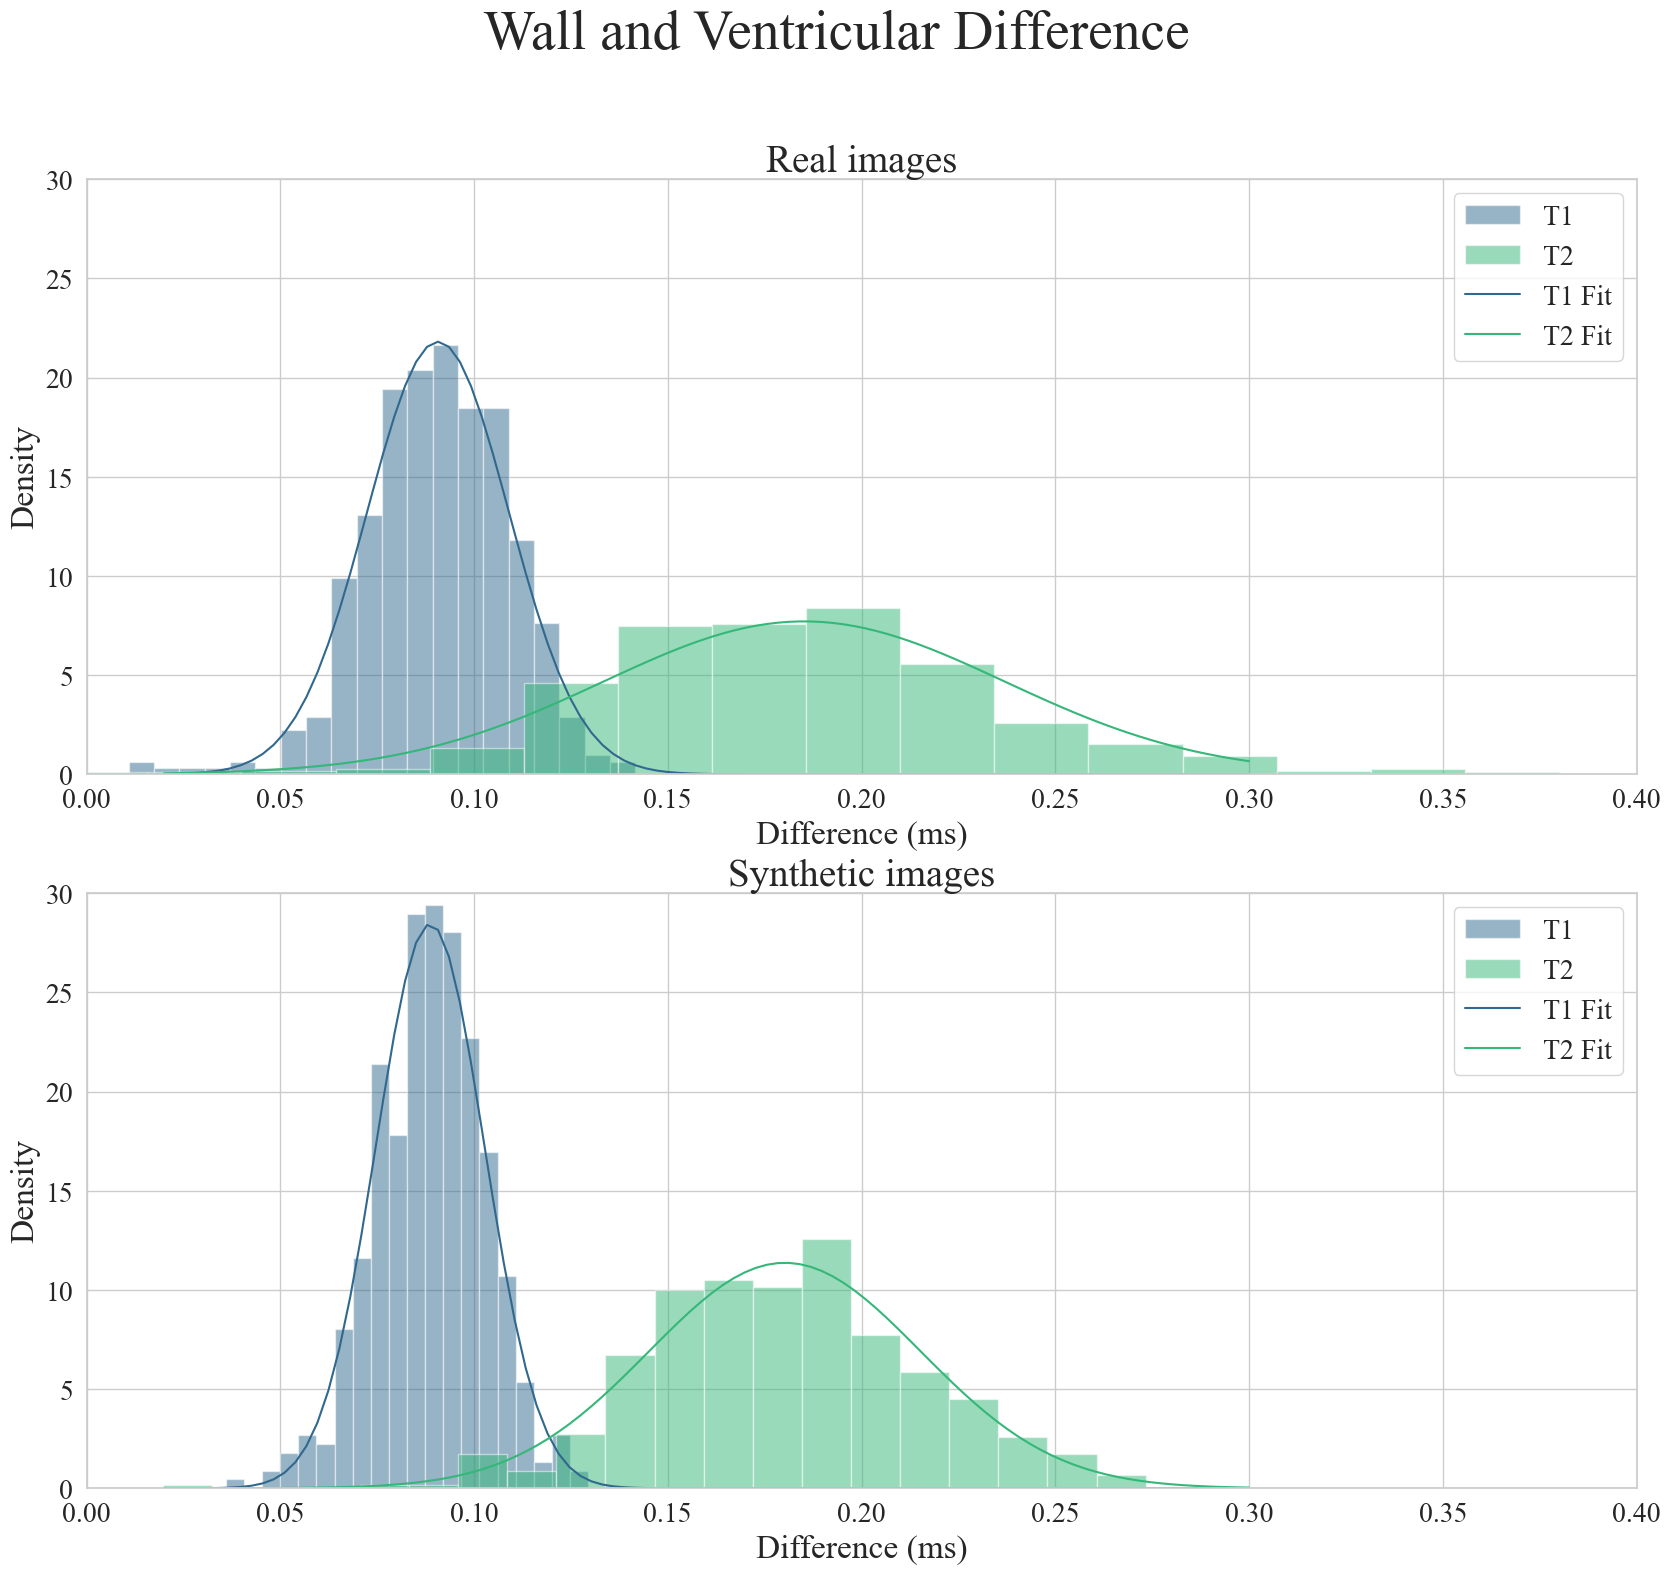

In [23]:
import seaborn as sns

# Set the Seaborn style
sns.set(style="whitegrid")

# Set the font to Times New Roman
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

# Create the subplots
fig, ax = plt.subplots(2, 1, figsize=(20, 17), )
fig.suptitle('Wall and Ventricular Difference', fontsize=40)

# Define colors
colors = sns.color_palette("viridis", 2)

# Plot real data
ax[0].hist(diff_T1_real, bins=20, alpha=0.5, label='T1', density=True, color=colors[0])
ax[0].hist(diff_T2_real, bins=20, alpha=0.5, label='T2', density=True, color=colors[1])
ax[0].plot(x, stats.norm.pdf(x, np.nanmean(diff_T1_real), np.nanstd(diff_T1_real)), label='T1 Fit', color=colors[0])
ax[0].plot(x, stats.norm.pdf(x, np.nanmean(diff_T2_real), np.nanstd(diff_T2_real)), label='T2 Fit', color=colors[1])
ax[0].legend(fontsize=20)
ax[0].set_title('Real images', fontsize=28)
ax[0].set_xlim([0, 0.4])
ax[0].set_ylim([0, 30])
ax[0].set_xlabel('Difference (ms)', fontsize=24)
ax[0].set_ylabel('Density', fontsize=24)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)

# Plot synthetic data
ax[1].hist(diff_T1_syn, bins=20, alpha=0.5, label='T1', density=True, color=colors[0])
ax[1].hist(diff_T2_syn, bins=20, alpha=0.5, label='T2', density=True, color=colors[1])
ax[1].plot(x, stats.norm.pdf(x, np.nanmean(diff_T1_syn), np.nanstd(diff_T1_syn)), label='T1 Fit', color=colors[0])
ax[1].plot(x, stats.norm.pdf(x, np.nanmean(diff_T2_syn), np.nanstd(diff_T2_syn)), label='T2 Fit', color=colors[1])
ax[1].legend(fontsize=20)
ax[1].set_title('Synthetic images', fontsize=28)
ax[1].set_xlim([0, 0.4])
ax[1].set_ylim([0, 30])
ax[1].set_xlabel('Difference (ms)', fontsize=24)
ax[1].set_ylabel('Density', fontsize=24)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)

plt.savefig('diff_hist_nice_bigger_text_ms_800.png', dpi=800, bbox_inches='tight')

plt.show()



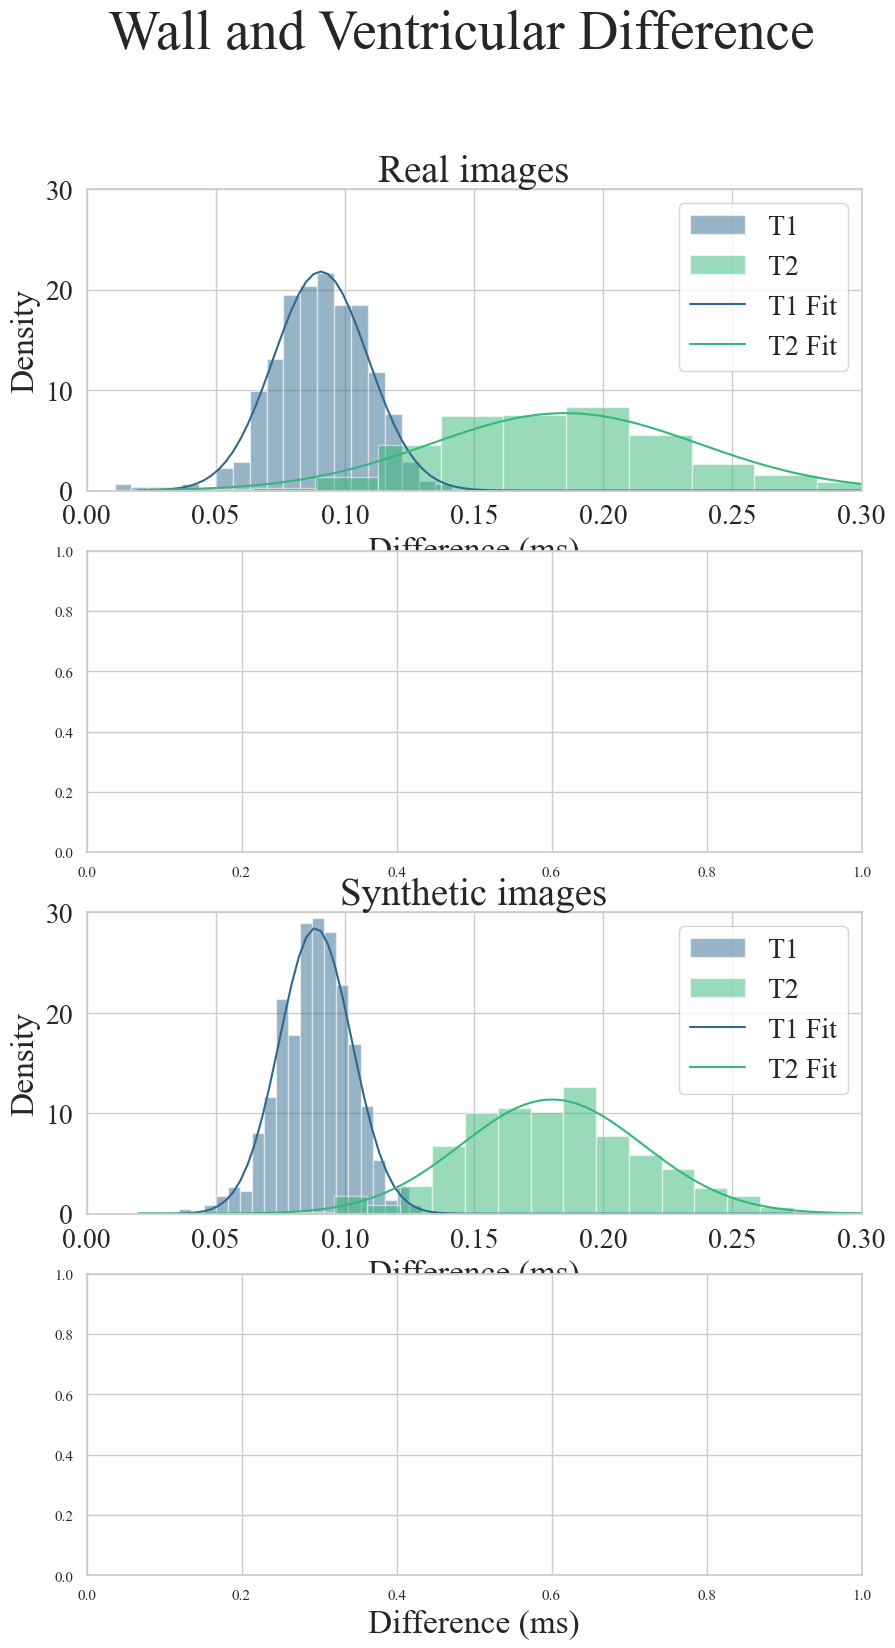

In [27]:
import seaborn as sns

# Set the Seaborn style
sns.set(style="whitegrid")

# Set the font to Times New Roman
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

# Create the subplots
fig, ax = plt.subplots(4, 1, figsize=(10, 18), )
fig.suptitle('Wall and Ventricular Difference', fontsize=40)

# Define colors
colors = sns.color_palette("viridis", 2)

# Plot real data
ax[0].hist(diff_T1_real, bins=20, alpha=0.5, label='T1', density=True, color=colors[0])
ax[0].hist(diff_T2_real, bins=20, alpha=0.5, label='T2', density=True, color=colors[1])
ax[0].plot(x, stats.norm.pdf(x, np.nanmean(diff_T1_real), np.nanstd(diff_T1_real)), label='T1 Fit', color=colors[0])
ax[0].plot(x, stats.norm.pdf(x, np.nanmean(diff_T2_real), np.nanstd(diff_T2_real)), label='T2 Fit', color=colors[1])
ax[0].legend(fontsize=20)
ax[0].set_title('Real images', fontsize=28)
ax[0].set_xlim([0, 0.3])
ax[0].set_ylim([0, 30])
ax[0].set_xlabel('Difference (ms)', fontsize=24)
ax[0].set_ylabel('Density', fontsize=24)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)

# Plot synthetic data
ax[2].hist(diff_T1_syn, bins=20, alpha=0.5, label='T1', density=True, color=colors[0])
ax[2].hist(diff_T2_syn, bins=20, alpha=0.5, label='T2', density=True, color=colors[1])
ax[2].plot(x, stats.norm.pdf(x, np.nanmean(diff_T1_syn), np.nanstd(diff_T1_syn)), label='T1 Fit', color=colors[0])
ax[2].plot(x, stats.norm.pdf(x, np.nanmean(diff_T2_syn), np.nanstd(diff_T2_syn)), label='T2 Fit', color=colors[1])
ax[2].legend(fontsize=20)
ax[2].set_title('Synthetic images', fontsize=28)
ax[2].set_xlim([0, 0.3])
ax[2].set_ylim([0, 30])
ax[2].set_xlabel('Difference (ms)', fontsize=24)
ax[2].set_ylabel('Density', fontsize=24)
ax[2].tick_params(axis='x', labelsize=20)
ax[2].tick_params(axis='y', labelsize=20)

ax[3].set_xlabel('Difference (ms)', fontsize=24)

plt.savefig('diff_hist_nice_bigger_text_ms_800_vertical.png', dpi=800, bbox_inches='tight')

plt.show()



In [8]:
# print means and stds
print(f'T1 Real: {np.nanmean(diff_T1_real)}, {np.nanstd(diff_T1_real)}')
print(f'T1 Synthetic: {np.nanmean(diff_T1_syn)}, {np.nanstd(diff_T1_syn)}')
print(f'T2 Real: {np.nanmean(diff_T2_real)}, {np.nanstd(diff_T2_real)}')
print(f'T2 Synthetic: {np.nanmean(diff_T2_syn)}, {np.nanstd(diff_T2_syn)}')

T1 Real: 0.09070944041013718, 0.01829127036035061
T1 Synthetic: 0.08868574351072311, 0.014022944495081902
T2 Real: 0.18519192934036255, 0.05175887420773506
T2 Synthetic: 0.18022023141384125, 0.03509462997317314


In [11]:
import torch as th

nan = float('nan')

data = {}
data['label'] = [[0, 1, 2],
                 [1, 2, 0],
                 [2, 0, 3],]

data['label'] = th.tensor(data['label'])
data['label'] = data['label'].long()

# create one-hot label map
label_map = data['label']
label_map = label_map[None, None, ...]
bs = 1
h = 3
w = 3
nc = 4
#nc = self.num_classes
input_label = th.FloatTensor(bs, nc, h, w).zero_()
input_semantics = input_label.scatter_(1, label_map, 1.0, )
print(input_semantics)
print(type(input_semantics[:, 1:, :, :]))




tensor([[[[1., 0., 0.],
          [0., 0., 1.],
          [0., 1., 0.]],

         [[0., 1., 0.],
          [1., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 1.],
          [0., 1., 0.],
          [1., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 1.]]]])
<class 'torch.Tensor'>


In [12]:
data['label'] = [[0, 1, 2],
                 [1, 2, 0],
                 [2, 0, 3],]
#data['label'] += 1
#data['label'] = np.pad(data['label'], ((0, 3), (0, 3)), mode='constant', constant_values=0)
from skimage.transform import resize
# convert to numpy
data['label'] = np.array(data['label'])
print(data['label'].shape)
#data['label'] = np.pad(data['label'], ((0, 5-3), (0, 5-3)), mode='constant', constant_values=0)
data['label'] = resize(data['label'], (5, 5), mode='constant', cval=0, preserve_range=True, anti_aliasing=False)
print(data['label'])

(3, 3)
[[0.   0.32 0.8  1.28 1.28]
 [0.32 0.8  1.4  1.28 0.96]
 [0.8  1.4  2.   0.8  0.  ]
 [1.28 1.28 0.8  1.4  1.44]
 [1.28 0.96 0.   1.44 1.92]]


In [60]:
def save_colored(image_array, path):
    for i, image in enumerate(image_array):
        file_name = f'{i:04d}.png'
        save_path = os.path.join(path, file_name)
        # use CMRmap for the color map and save the image without showing it
        plt.imsave(save_path, image, cmap='CMRmap', vmin=0, vmax=4095)

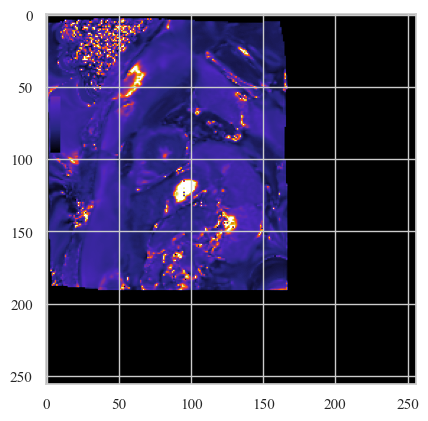

In [58]:
# show syn_images[0] in cmrmap
plt.imshow(syn_images[3], cmap='CMRmap', vmin=0, vmax=4095)

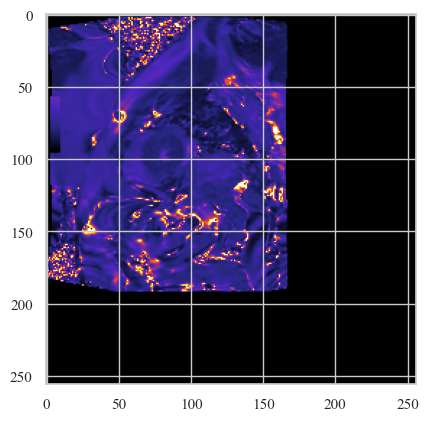

In [59]:
plt.imshow(real_images[3], cmap='CMRmap', vmin=0, vmax=4095)

In [45]:
import numpy as np
real_images = np.array(real_images)
syn_images = np.array(syn_images)

real_images = real_images * 4095
syn_images = syn_images * 4095


In [61]:



# save the colored images
save_colored(real_images, '/mnt/d/projects/cardiac_gan/results/2024-06-08_21-15-55/testold/2024-06-08_21-15-55/real_colored')

save_colored(syn_images, '/mnt/d/projects/cardiac_gan/results/2024-06-08_21-15-55/testold/2024-06-08_21-15-55/syn_colored')


